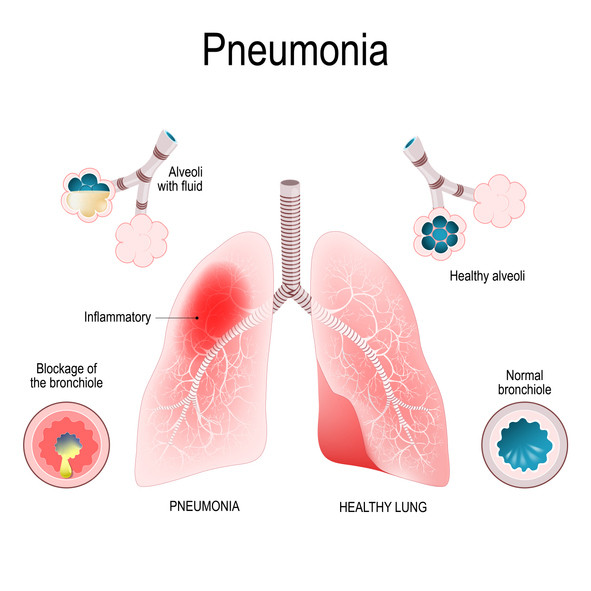

In [1]:
from IPython.display import Image
Image("../input/pneumoniadata/Pneumonia.jpg")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob
import seaborn as sns

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
print("Importing libraries completed.")

Importing libraries completed.


In [4]:
path = '../input/chest-xray-pneumonia/chest_xray/'

In [5]:
train_folder=path+"train/"
train_normal_dir=train_folder+"NORMAL/"
train_pneu_dir=train_folder+"PNEUMONIA/"

In [6]:
test_folder=path+"test/"
test_normal_dir=test_folder+"NORMAL/"
test_pneu_dir=test_folder+"PNEUMONIA/"

In [7]:
val_folder=path+"val/"
val_normal_dir=val_folder+"NORMAL/"
val_pneu_dir=val_folder+"PNEUMONIA/"

In [8]:
img_width=196
img_height=196
batch_size=64
epochs=10
print("Variable declaration completed.")

Variable declaration completed.


In [9]:
train_class_names=os.listdir(train_folder)
print("Train class names: %s" % (train_class_names))

test_class_names=os.listdir(test_folder)
print("Test class names: %s" % (test_class_names))

val_class_names=os.listdir(val_folder)
print("Validation class names: %s" % (val_class_names))
print("\nDataset class name listing completed.")

Train class names: ['PNEUMONIA', 'NORMAL']
Test class names: ['PNEUMONIA', 'NORMAL']
Validation class names: ['PNEUMONIA', 'NORMAL']

Dataset class name listing completed.


In [10]:
def Get_Xray_Type(argument):
    switcher = {
        "NORMAL": "Normal",
        "PNEUMONIA": "Pneumonia",
    }
    return switcher.get(argument, "Invalid X-ray")
print("Declaration of functions completed.")
train_normal_cases = glob.glob(train_normal_dir + '*jpeg')
train_pneu_cases = glob.glob(train_pneu_dir + '*jpeg')

test_normal_cases = glob.glob(test_normal_dir + '*jpeg')
test_pneu_cases = glob.glob(test_pneu_dir + '*jpeg')

val_normal_cases = glob.glob(val_normal_dir + '*jpeg')
val_pneu_cases = glob.glob(val_pneu_dir + '*jpeg')

train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, "Normal"])
    
for x in train_pneu_cases:
    train_list.append([x, "Pneumonia"])
    
for x in test_normal_cases:
    test_list.append([x, "Normal"])
    
for x in test_pneu_cases:
    test_list.append([x, "Pneumonia"])
    
for x in val_normal_cases:
    val_list.append([x, "Normal"])
    
for x in val_pneu_cases:
    val_list.append([x, "Pneumonia"])
    
train_df = pd.DataFrame(train_list, columns=['image', 'Diagnos'])
print(train_df.shape)
test_df = pd.DataFrame(test_list, columns=['image', 'Diagnos'])
print(test_df.shape)
val_df = pd.DataFrame(val_list, columns=['image', 'Diagnos'])
print(val_df.shape)

Declaration of functions completed.
(5216, 2)
(624, 2)
(16, 2)


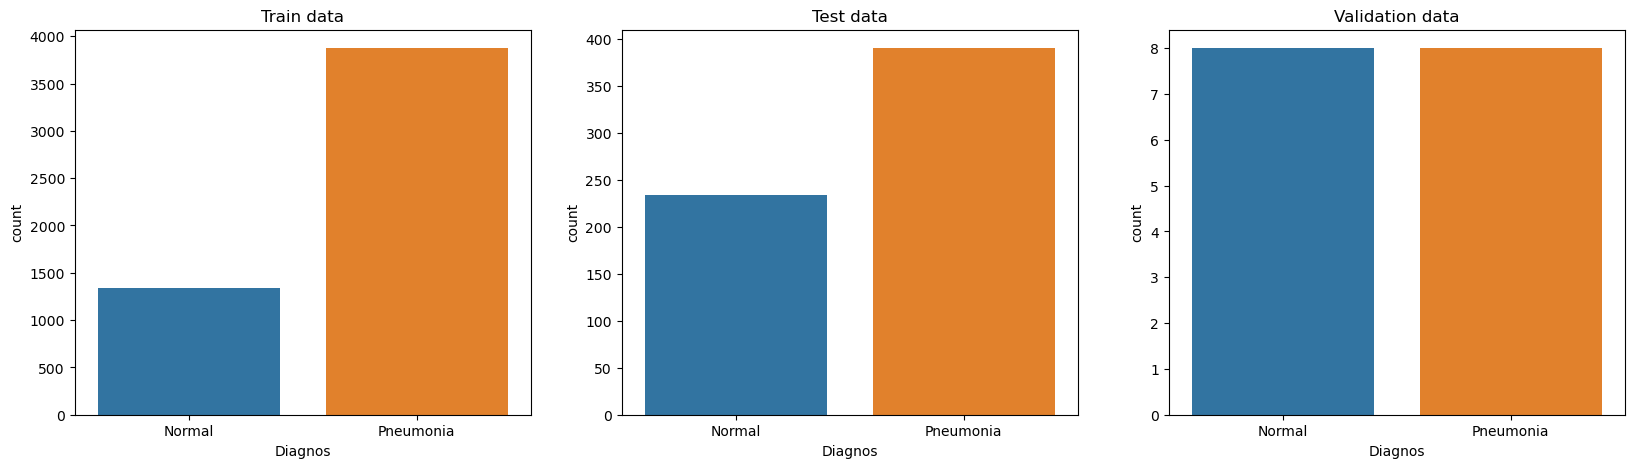

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
# sns.countplot(train_df['Diagnos'])
sns.countplot(x ='Diagnos', data = train_df)
plt.title('Train data')

plt.subplot(1,3,2)
# sns.countplot(test_df['Diagnos'])
sns.countplot(x ='Diagnos', data = test_df)
plt.title('Test data')

plt.subplot(1,3,3)
# sns.countplot(val_df['Diagnos'])
sns.countplot(x ='Diagnos', data = val_df)
plt.title('Validation data')

plt.show()

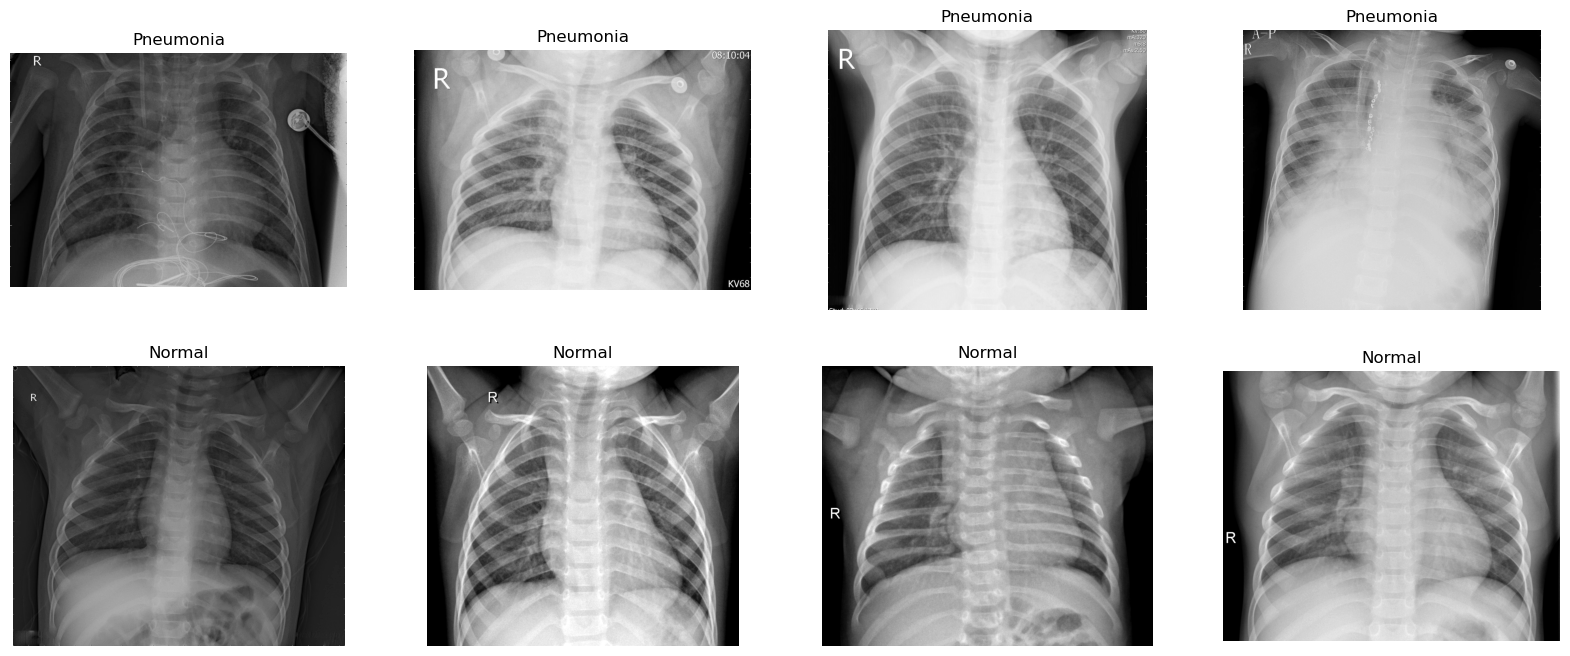

In [12]:
plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Pneumonia"][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Pneumonia')
    
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Normal"][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')

In [13]:
x=[]
y=[]

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        img=image.img_to_array(img)
        img=preprocess_input(img)
        x.append(img)  
        y.append(train_class_names.index(folder))
        
print("Preparing Training Dataset Completed.")   

Preparing Training Dataset Completed.


In [14]:
val_images=[]
val_images_Original=[]
val_image_label=[]

for folder in os.listdir(val_folder):
    image_list=os.listdir(val_folder+"/"+folder)
    for img_name in image_list:
        img=image.load_img(val_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        img=image.img_to_array(img)
        val_images_Original.append(img.copy())
        img=preprocess_input(img)
        val_images.append(img)
        val_image_label.append(val_class_names.index(folder))
        
print("Preparing Validation Dataset Completed.")        

Preparing Validation Dataset Completed.


In [15]:
test_images=[]
test_images_Original=[]
test_image_label=[]

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        img=image.img_to_array(img)
        test_images_Original.append(img.copy())
        img=preprocess_input(img)
        test_images.append(img) # appending image array
        test_image_label.append(test_class_names.index(folder))
        
print("Preparing Test Dataset Completed.")        

Preparing Test Dataset Completed.


In [16]:
print("Training Dataset")
x=np.array(x)
print(x.shape)
y=to_categorical(y)
print(y.shape)
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)
test_image_label=to_categorical(test_image_label)
print(test_image_label.shape)
print("Validation Dataset")
val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label)
print(val_image_label.shape)

Training Dataset
(5216, 196, 196, 3)
(5216, 2)
Test Dataset
(624, 196, 196, 3)
(624, 2)
Validation Dataset
(16, 196, 196, 3)
(16, 2)


In [17]:
print("Summary of default ResNet50 model.\n")
model_resnet50=ResNet50(weights='imagenet')
model_resnet50.summary()

Summary of default ResNet50 model.

102967424/102967424 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                      

In [18]:
print("Summary of Custom ResNet-50 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")
input_layer=layers.Input(shape=(img_width,img_height,3))
model_resnet50=ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)
model_resnet50.summary()

Summary of Custom ResNet-50 model.

1) We setup input layer and 2) We removed top (last) layer. 

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 196, 196, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 202, 202, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 98, 98, 64)   9472        ['conv1_pad[0][0]']              
                           

In [19]:
print("Summary of Custom ResNet50 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_resnet50.output
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(2,activation='softmax')(flatten)
model=models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Summary of Custom ResNet50 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 196, 196, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 202, 202, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 98, 98, 64)   9472        ['conv1_pad[0][0]']              
                                                                                    

In [20]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 196, 196, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 202, 202, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 98, 98, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizatio

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [23]:
model.fit(xtrain,ytrain,epochs=epochs,batch_size=batch_size,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/10
66/66 [==============================] - 19s 145ms/step - loss: 1.7248 - accuracy: 0.9386 - val_loss: 0.4393 - val_accuracy: 0.9818
Epoch 2/10
66/66 [==============================] - 8s 124ms/step - loss: 0.1625 - accuracy: 0.9885 - val_loss: 0.3324 - val_accuracy: 0.9808
Epoch 3/10
66/66 [==============================] - 9s 137ms/step - loss: 0.0845 - accuracy: 0.9940 - val_loss: 0.3537 - val_accuracy: 0.9847
Epoch 4/10
66/66 [==============================] - 8s 121ms/step - loss: 0.0809 - accuracy: 0.9926 - val_loss: 0.4198 - val_accuracy: 0.9808
Epoch 5/10
66/66 [==============================] - 8s 122ms/step - loss: 0.0203 - accuracy: 0.9962 - val_loss: 0.4070 - val_accuracy: 0.9799
Epoch 6/10
66/66 [==============================] - 8s 122ms/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 0.4049 - val_accuracy: 0.9818
Epoch 7/10
66/66 [==============================] - 9s 137ms/step - loss: 0.0155 - accuracy: 0.9981 - val_loss: 0.2930 - val_accuracy: 0.9856
Epoch

In [24]:
def predict(img_name):
    img=image.load_img(img_name,target_size=(img_width,img_height))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
    prediction=model.predict(img.reshape(1,img_width,img_height,3))
    output=np.argmax(prediction)
    print(train_class_names[output] + ": " + Get_Xray_Type(train_class_names[output]))

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: 
        color='green' 
    else:
        color='red' 
    

    
    plt.xlabel("{} {:2.0f}% \n ({})".format(str(Get_Xray_Type(val_class_names[predicted_label])), 100*np.max(predictions_array), str(Get_Xray_Type(val_class_names[true_label])), color=color, horizontalalignment='left'))

def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [25]:
val_predictions=[]

for img in val_images:
    img=img.reshape(1,img_width,img_height,3)
    val_predictions.append(model.predict(img))
    
test_predictions=[]

for img in test_images:
    img=img.reshape(1,img_width,img_height,3)
    test_predictions.append(model.predict(img))

1/1 [==============================] - 0s 27ms/step


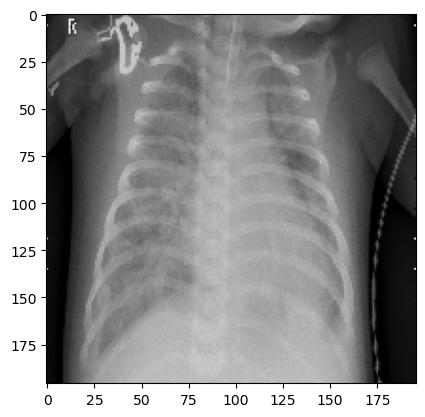

1/1 [==============================] - 0s 26ms/step
PNEUMONIA: Pneumonia


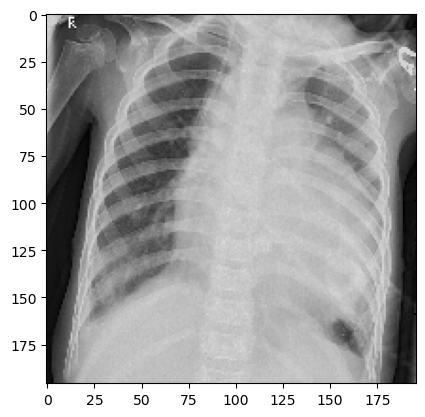

1/1 [==============================] - 0s 26ms/step
PNEUMONIA: Pneumonia


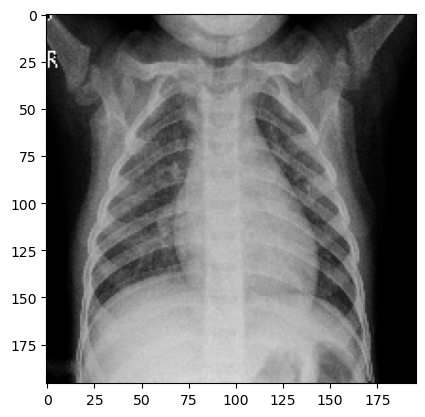

1/1 [==============================] - 0s 26ms/step
NORMAL: Normal


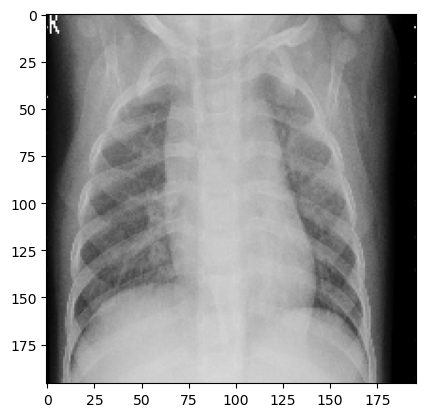

1/1 [==============================] - 0s 25ms/step
PNEUMONIA: Pneumonia


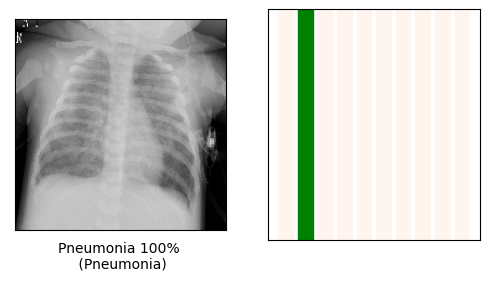

In [26]:
predict('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg') 

predict('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person108_bacteria_506.jpeg') 

predict('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg')

predict('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg')

i=random.randrange(1,10)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,val_predictions, val_image_label, val_images_Original) 
plt.subplot(1,2,2)
plot_value_array(i, val_predictions, val_image_label)
plt.show()

Classification of Test Chest X-ray into Normal and Pneumonia using Transfer Learning (ResNet50)

Predicted Diagnose, Percentage, (Original Diagnose)



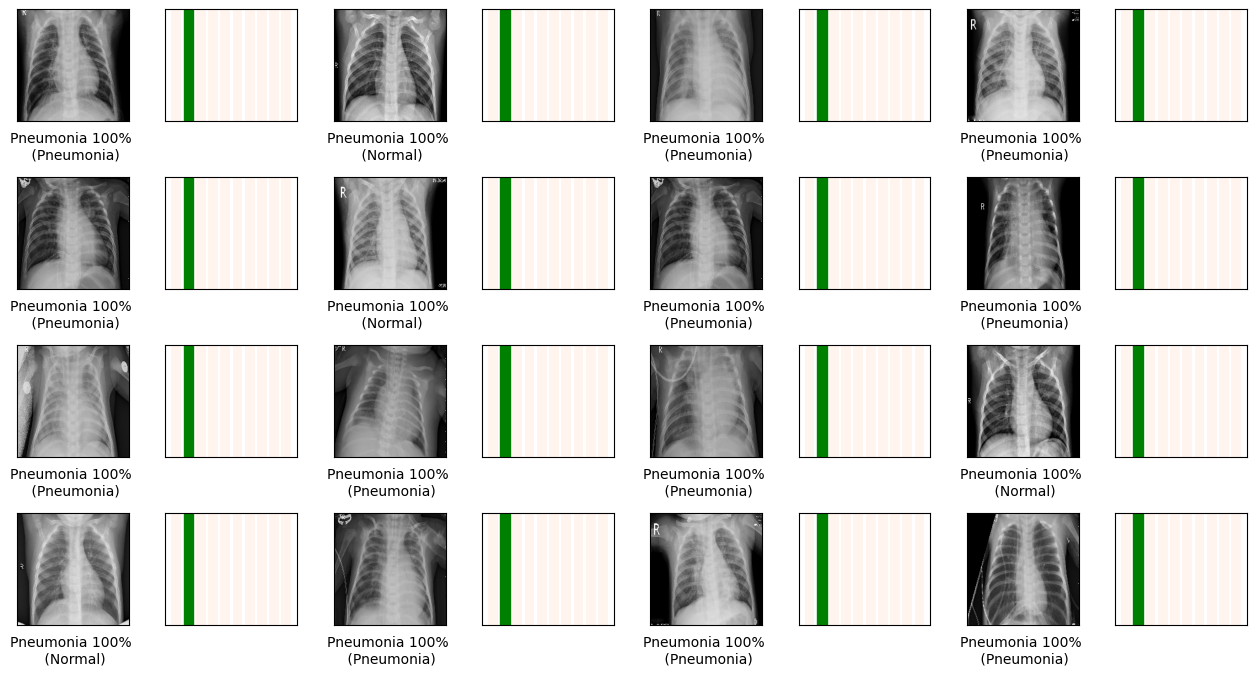

In [27]:
num_rows=4
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of Test Chest X-ray into Normal and Pneumonia using Transfer Learning (ResNet50)\n")
print("Predicted Diagnose, Percentage, (Original Diagnose)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    indexer=random.randrange(1,624)
    plot_image(indexer,test_predictions, test_image_label, test_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(indexer, test_predictions, test_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [28]:
import pickle

In [29]:
pickle.dump(model, open('mymodel.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
......activation_24
.........vars
......activation_25
.........vars
......activation_26
.........vars
......activation_27
.........vars
......activation_28
.........vars
......activation_29
.........vars
......activation_3
.........vars
......activation_30
.........vars
......activation_31
.........vars
......activation_32
.........vars
......activa

In [30]:
pickled_model=pickle.load(open('mymodel.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-25 13:30:36        85341
variables.h5                                   2023-04-25 13:30:36     97223792
metadata.json                                  2023-04-25 13:30:36           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
..

In [31]:
def predict(img_name):
    img=image.load_img(img_name,target_size=(img_width,img_height))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
    prediction=pickled_model.predict(img.reshape(1,img_width,img_height,3))
    output=np.argmax(prediction)
    print(train_class_names[output] + ": " + Get_Xray_Type(train_class_names[output]))

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: 
        color='green' 
    else:
        color='red' 
    

    
    plt.xlabel("{} {:2.0f}% \n ({})".format(str(Get_Xray_Type(val_class_names[predicted_label])),100*np.max(predictions_array), str(Get_Xray_Type(val_class_names[true_label])), color=color, horizontalalignment='left'))

def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [32]:
val_predictions=[]

for img in val_images:
    img=img.reshape(1,img_width,img_height,3)
    val_predictions.append(pickled_model.predict(img))
    
test_predictions=[]

for img in test_images:
    img=img.reshape(1,img_width,img_height,3)
    test_predictions.append(pickled_model.predict(img))

1/1 [==============================] - 0s 25ms/step


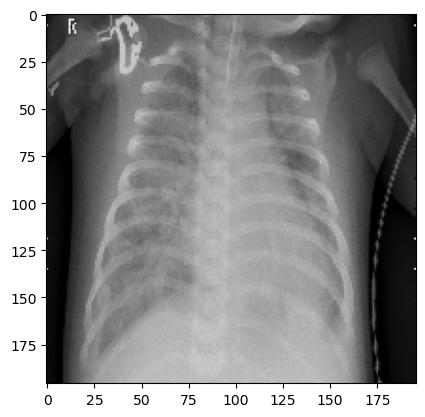

1/1 [==============================] - 0s 26ms/step
PNEUMONIA: Pneumonia


In [33]:
predict('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg') 